In [94]:
import numpy as np
from numpy import random

from qpy import *

import matplotlib.pyplot as plt

# from qpy.linalg import *
# from qpy.gates import *
# from qpy.measurement import *


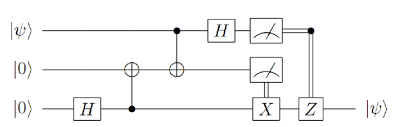

In [75]:
def bell_pair():
    bell_state = np.kron(zero,zero)
    bell_state = np.dot(np.kron(H, I), bell_state)
    bell_state = np.dot(cnot, bell_state)
    
    return bell_state

print(bell_pair())

def teleport_quantum_state(original_state):
    """Teleports a quantum state using an entangled Bell state."""
    #num_qubits = len(original_state)
    bell_state = bell_pair()

    state = np.kron(original_state, bell_state)
    
    # Apply CNOT controlled by original state
    state = cnot_nonadj(0, 1, 3)@state

    # Apply Hadamard to controlled qubit
    state = add_gate(H, 0, 3)@state

    # Measure both control qubits
    state, outcome0 = measure(state, 0)
    
    state, outcome1 = measure(state, 1)
    
    if outcome1 == 1:
        state = add_gate(X, 2, 3)@state
    if outcome0 == 1:
        state = add_gate(Z, 2, 3)@state
        
    # state, output= measure(state, 2)
    # print(state, output)
    
    return state

[0.70710678 0.         0.         0.70710678]


In [76]:
def prep_state_angle(theta):
    state = zero
    state = Rx(theta)@state
    return state

In [77]:
ratio_list = []
theta_list = np.linspace(0, 2*np.pi, 20)

for theta in theta_list:
    
    count1 = 0
    count0 = 0
    
    for i in range(500):
      
        st = prep_state_angle(theta)
        
        stt = teleport_quantum_state(st)
        stt, output= measure(stt, 2)
        # st_m = measure(st)
        
        if output == 1:
            count1 = count1 + 1
        if output == 0:
            count0 = count0 + 1
            
    ratio = count1/(count0 + count1)
    ratio_list.append(ratio)
        

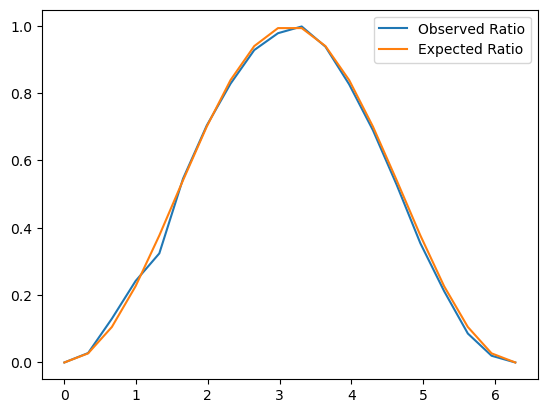

In [78]:
plt.plot(theta_list, ratio_list, label = 'Observed Ratio')
plt.plot(theta_list, (1 - np.cos(theta_list))/2, label = 'Expected Ratio')
plt.legend()
plt.show()

In [79]:
stt = teleport_quantum_state([1/np.sqrt(2),1/np.sqrt(2)])
print(stt)

[0.70710678 0.70710678 0.         0.         0.         0.
 0.         0.        ]


In [80]:
#toffoli gate 
def TOFFOLI(control1, control2, target, num_qubits):
    
    if control1 == target or control2 == target:
        raise ValueError("Control and Target qubits must be different.")
    
    if not (0<= control1 <= num_qubits-1) or not (0<= target <= num_qubits-1) or not (0<= control2 <= num_qubits-1):
        raise ValueError("Control and target qubits must be within range")
        
    # Ensure control_qubits are ordered in ascending order of indices
    c1, c2 = sorted([control1, control2])

    # Apply the controlled NOT gate with padding
    if c2 < target: # If both controls are before the target
        operator = apply_kron([*[I]*(c1), np.outer(zero,zero), *[I]*(c2 - c1 - 1), np.outer(zero,zero), *[I]*(target - c2 - 1), [I], *[I]*(num_qubits - target - 1)]) + apply_kron([*[I]*(c1), np.outer(one,one), *[I]*(c2 - c1 - 1), np.outer(zero,zero), *[I]*(target - c2 - 1), [I], *[I]*(num_qubits - target - 1)]) + apply_kron([*[I]*(c1), np.outer(zero,zero), *[I]*(c2 - c1 - 1), np.outer(one,one), *[I]*(target - c2 - 1), [I], *[I]*(num_qubits - target - 1)]) + apply_kron([*[I]*(c1), np.outer(one,one), *[I]*(c2 - c1 - 1), np.outer(one,one), *[I]*(target - c2 - 1), X, *[I]*(num_qubits - target - 1)])
    elif c1 < target < c2: # If target qubit is in the middle of both controls
        operator = apply_kron([*[I]*(c1), np.outer(zero,zero), *[I]*(target - c1 - 1), [I], *[I]*(c2 - target - 1), np.outer(zero,zero), *[I]*(num_qubits - c2 - 1)]) + apply_kron([*[I]*(c1), np.outer(one,one), *[I]*(target - c1 - 1), [I], *[I]*(c2 - target - 1), np.outer(zero,zero), *[I]*(num_qubits - c2 - 1)]) + apply_kron([*[I]*(c1), np.outer(zero,zero), *[I]*(target - c1 - 1), [I], *[I]*(c2 - target - 1), np.outer(one,one), *[I]*(num_qubits - c2 - 1)]) + apply_kron([*[I]*(c1), np.outer(one,one), *[I]*(target - c1 - 1), X, *[I]*(c2 - target - 1), np.outer(one,one), *[I]*(num_qubits - c2 - 1)])
    elif target < c1: # if target is before both controls
        operator = apply_kron([*[I]*(target), [I], *[I]*(c1 - target - 1), np.outer(zero,zero), *[I]*(c2 - c1- 1), np.outer(zero,zero), *[I]*(num_qubits - c2 - 1)]) + apply_kron([*[I]*(target), [I], *[I]*(c1 - target - 1), np.outer(one,one), *[I]*(c2 - c1- 1), np.outer(zero,zero), *[I]*(num_qubits - c2 - 1)]) + apply_kron([*[I]*(target), [I], *[I]*(c1 - target - 1), np.outer(zero,zero), *[I]*(c2 - c1- 1), np.outer(one,one), *[I]*(num_qubits - c2 - 1)]) + apply_kron([*[I]*(target), X, *[I]*(c1 - target - 1), np.outer(one,one), *[I]*(c2 - c1- 1), np.outer(one, one), *[I]*(num_qubits - c2 - 1)])
        
    return operator
    

In [81]:
tof = TOFFOLI(2, 0 , 1,3)
print(tof)

tof2 = TOFFOLI(0, 2, 1, 3)
print(tof2)

[[[1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0.]]]
[[[1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0.]]]


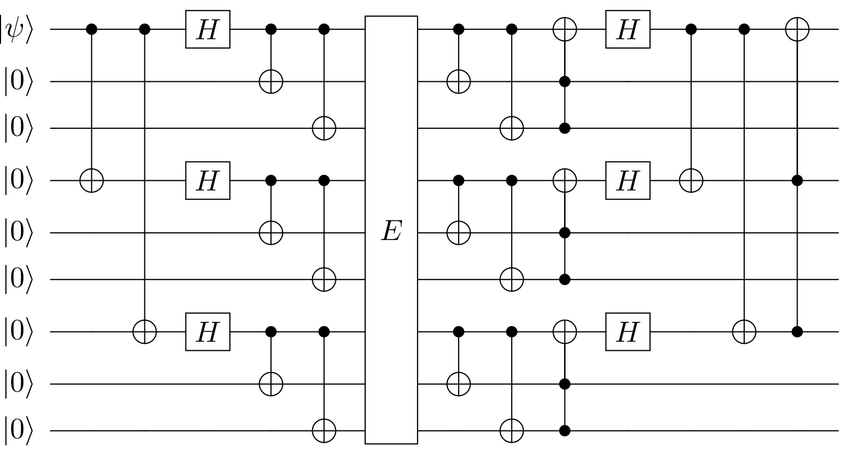

In [82]:
# For the final demo try to implement the Shor encoding/decoding circuit. 
# You will need to implement the toffoli gate as we discussed. ----- DONE
# Create functions which apply the shor_encode and shor_decode circuits ----- DONE 
# verify that when you encode and decode a qubit you get the same result. 


#Shors encoding/decoding circuit
def shor_encode(state):
    num_qubits = len(state)
    
    state = cnot_nonadj(0, 3, num_qubits)@state
    state = cnot_nonadj(0, 6, num_qubits)@state
    print(state)

    state = add_gate(H, 0, num_qubits)@state
    state = add_gate(H, 3, num_qubits)@state
    state = add_gate(H, 6, num_qubits)@state
    
    state = cnot_adj(0, 1, num_qubits)@state
    state = cnot_adj(3, 4, num_qubits)@state
    state = cnot_adj(6, 7, num_qubits)@state
    
    state = cnot_nonadj(0, 2, num_qubits)@state
    state = cnot_nonadj(3, 5, num_qubits)@state
    state = cnot_nonadj(6, 8, num_qubits)@state

    return state 

In [83]:
def shor_decode(state):
    num_qubits = len(state)
    
    state = cnot_adj(0, 1, num_qubits)@state
    state = cnot_adj(3, 4, num_qubits)@state
    state = cnot_adj(6, 7, num_qubits)@state
    
    state = cnot_nonadj(0, 2, num_qubits)@state
    state = cnot_nonadj(3, 5, num_qubits)@state
    state = cnot_nonadj(6, 8, num_qubits)@state
    
    state = TOFFOLI(1, 2, 0, num_qubits)@state
    state = TOFFOLI(4, 5, 3, num_qubits)@state
    state = TOFFOLI(7, 8, 6, num_qubits)@state
    
    state = add_gate(H, 0, num_qubits)@state
    state = add_gate(H, 3, num_qubits)@state
    state = add_gate(H, 6, num_qubits)@state
    
    state = cnot_nonadj(0, 3, num_qubits)@state
    state = cnot_nonadj(0, 6, num_qubits)@state
    state = TOFFOLI(3, 6, 0, num_qubits)@state
    
    return state    

In [84]:
enc = [0,0,0,0,0,0,0,0,0]

num_qubits = len(enc)
state = cnot_nonadj(0, 3, num_qubits)@enc
print(state)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 9 is different from 512)

In [90]:
state = [0,0,1,1]
num_qubits = len(state)
cc = cnot_nonadj(0, 2, num_qubits)
print(cc)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [92]:
%debug

> c:\users\raisa\anaconda3\lib\site-packages\ipython\core\compilerop.py(86)ast_parse()
     84         Arguments are exactly the same as ast.parse (in the standard library),
     85         and are passed to the built-in compile function."""
---> 86         return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)
     87 
     88     def reset_compiler_flags(self):



In [91]:
# Now randomly apply an error (pauli X Y or Z to a random qubit) after encoding the circuit 
# verify that the state of the encoded qubit is the same. 
state = 
enc = shor_encode(state)

# enc2 = add_gate(X, 4, 9)@enc

g = random.randint(3)
target = random.randint(9)
if g == 0:
    enc2 = add_gate(X, target, 9)@enc
elif g == 1:
    enc2 = add_gate(Y, target, 9)@enc
else:
    enc2 = add_gate(Z, target, 9)@enc
    
print(g)

print(enc, enc2)

SyntaxError: invalid syntax (3147122751.py, line 3)

In [120]:
# The overall state may change but the first qubit should have the same state. 
# You can test this by measuring an ensemble of these states and computing the ratio that collapse to 1
# similar to the rotation plot we made




0
